In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arumrahmah","key":"068b6671c196af5c24a60ee061c8c49f"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d amitvkulkarni/lifestyle-factors-influencing-osteoporosis

Dataset URL: https://www.kaggle.com/datasets/amitvkulkarni/lifestyle-factors-influencing-osteoporosis
License(s): Apache 2.0
  0% 0.00/25.2k [00:00<?, ?B/s]
100% 25.2k/25.2k [00:00<00:00, 15.5MB/s]


In [4]:
!mkdir lifestyle-factors-influencing-osteoporosis
!unzip lifestyle-factors-influencing-osteoporosis.zip -d lifestyle-factors-influencing-osteoporosis
!ls lifestyle-factors-influencing-osteoporosis

Archive:  lifestyle-factors-influencing-osteoporosis.zip
  inflating: lifestyle-factors-influencing-osteoporosis/osteoporosis.csv  
osteoporosis.csv


In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [6]:
df = pd.read_csv("/content/lifestyle-factors-influencing-osteoporosis/osteoporosis.csv")

In [7]:
df.head(10)

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1
5,1799320,41,Male,Normal,Yes,Caucasian,Normal,Low,Sufficient,Active,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
6,1577644,20,Male,Postmenopausal,Yes,African American,Underweight,Adequate,Sufficient,Sedentary,No,NaN,Rheumatoid Arthritis,NaN,No,1
7,1443912,39,Male,Postmenopausal,Yes,Asian,Normal,Adequate,Sufficient,Sedentary,No,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,1
8,1379331,70,Male,Postmenopausal,No,Asian,Underweight,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
9,1824991,19,Female,Normal,No,African American,Normal,Low,Sufficient,Active,Yes,Moderate,NaN,Corticosteroids,Yes,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [9]:
cols = ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures']

In [10]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,PowerTransformer

le = LabelEncoder()

df[cols] = df[cols].apply(le.fit_transform)
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,0,0,1,1,1,1,1,1,1,0,1,0,1,1
1,1419098,32,0,0,1,1,1,1,1,1,0,1,2,1,1,1
2,1797916,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,1805337,78,0,0,0,2,1,0,0,1,1,1,1,0,0,1
4,1351334,38,1,1,1,0,0,1,1,0,1,1,1,1,1,1


In [11]:
df.drop(columns=["Id", "Medications", "Alcohol Consumption",],inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 1958 non-null   int64
 1   Gender              1958 non-null   int64
 2   Hormonal Changes    1958 non-null   int64
 3   Family History      1958 non-null   int64
 4   Race/Ethnicity      1958 non-null   int64
 5   Body Weight         1958 non-null   int64
 6   Calcium Intake      1958 non-null   int64
 7   Vitamin D Intake    1958 non-null   int64
 8   Physical Activity   1958 non-null   int64
 9   Smoking             1958 non-null   int64
 10  Medical Conditions  1958 non-null   int64
 11  Prior Fractures     1958 non-null   int64
 12  Osteoporosis        1958 non-null   int64
dtypes: int64(13)
memory usage: 199.0 KB


In [13]:
df.to_csv('osteo_dataset.csv')

In [14]:
df['Osteoporosis'].value_counts()

Osteoporosis
1    979
0    979
Name: count, dtype: int64

In [15]:
df.head(10)

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Medical Conditions,Prior Fractures,Osteoporosis
0,69,0,0,1,1,1,1,1,1,1,1,1,1
1,32,0,0,1,1,1,1,1,1,0,2,1,1
2,89,0,1,0,2,0,0,1,0,0,0,0,1
3,78,0,0,0,2,1,0,0,1,1,1,0,1
4,38,1,1,1,0,0,1,1,0,1,1,1,1
5,41,1,0,1,2,0,1,1,0,1,1,1,1
6,20,1,1,1,0,1,0,1,1,0,1,0,1
7,39,1,1,1,1,0,0,1,1,0,1,1,1
8,70,1,1,0,1,1,1,1,0,1,1,0,1
9,19,0,0,0,0,0,1,1,0,1,2,1,1


In [16]:
df.isnull().sum()

Age                   0
Gender                0
Hormonal Changes      0
Family History        0
Race/Ethnicity        0
Body Weight           0
Calcium Intake        0
Vitamin D Intake      0
Physical Activity     0
Smoking               0
Medical Conditions    0
Prior Fractures       0
Osteoporosis          0
dtype: int64

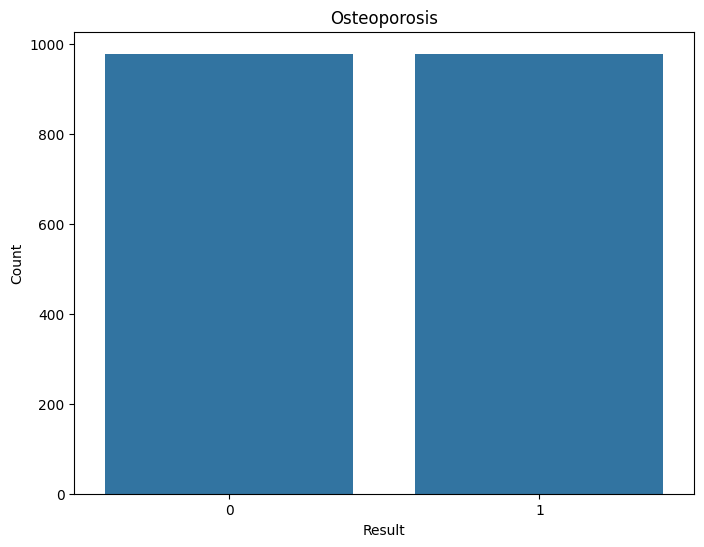

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Osteoporosis', data=df)
plt.title('Osteoporosis')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

In [102]:
X = df.drop("Osteoporosis",axis=1)
Y = pd.get_dummies(df['Osteoporosis'])

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [104]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (1566, 12)
Shape of Y_train is: (1566, 2)

Shape of X_test is: (392, 12)
Shape of Y_test is: (392, 2)


In [105]:
input_dim = X.shape[1]
print(input_dim)

12


In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Concatenate
model = Sequential()
model.add(Dense(64, input_dim = input_dim, kernel_initializer='normal', activation='relu'))
# model.add(Dense(32,kernel_initializer='normal', activation='relu'))
# model.add(Dense(8,kernel_initializer='normal', activation='relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [107]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [108]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                832       
                                                                 
 dense_15 (Dense)            (None, 2)                 130       
                                                                 
Total params: 962 (3.76 KB)
Trainable params: 962 (3.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
result = model.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
49/49 [==============================] - 1s 3ms/step - loss: 0.6996 - accuracy: 0.5575
Epoch 2/100
49/49 [==============================] - 0s 3ms/step - loss: 0.5044 - accuracy: 0.7331
Epoch 3/100
49/49 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.7899
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.7989
Epoch 5/100
49/49 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.7995
Epoch 6/100
49/49 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.7995
Epoch 7/100
49/49 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.7957
Epoch 8/100
49/49 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8059
Epoch 9/100
49/49 [==============================] - 0s 3ms/step - loss: 0.4081 - accuracy: 0.8078
Epoch 10/100
49/49 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8059
Epoch 11/

In [110]:
y_pred =model.predict(X_test)
y_pred = (y_pred>0.5)

13/13 [==============================] - 0s 2ms/step


In [111]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8010204081632653


In [112]:
model.save('./osteoporosis.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [113]:
model = tf.keras.models.load_model('./osteoporosis.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./osteoporosis.tflite", "wb").write(tflite_model)

5564